In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn import metrics
import math
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import KFold
from keras.callbacks import EarlyStopping

In [28]:
df = pd.read_csv('merge_final.csv')

In [29]:
df.isnull().values.sum()

0

In [30]:
y = df['LOS']
X = df.loc[:, df.columns != 'LOS']
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X_main, X_hold, y_main, y_hold = train_test_split(X, y, test_size=0.1)


In [31]:

kf = KFold(n_splits=10)


In [34]:
# define the keras model
#df_features must be without LOS
#df_target must be in binary
oos_y=[]
oos_pred=[]
#X_train = X_train.dropna(how='any',axis=0).reset_index()
#y_train = y_train.dropna(how='any',axis=0).reset_index()

for train_index,test_index in kf.split(X_main):
    X_train = X_main[train_index]
    X_test = X_main[test_index]
    y_train = y_main[train_index]
    y_test= y_main[test_index]

    model = Sequential()
    model.add(Dense((X.shape[1])-10, input_dim=X.shape[1], activation='relu'))
    model.add(Dense((X.shape[1])-50, activation='relu'))
    model.add(Dense((X.shape[1])-70, activation='relu'))
    model.add(Dense(1))

    monitor = EarlyStopping(monitor='val_loss', min_delta = 1e-3, patience=5,verbose=1, mode='auto')
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, y_train,validation_data=(X_test,y_test),callbacks=[monitor], verbose=0,epochs=1000)
    pred = model.predict(X_test)
    oos_y.append(y_test)
    oos_pred.append(pred)
    
    score = np.sqrt(metrics.mean_squared_error(pred,y_test))
    print('Fold score : {}'.format(score))

oos_y=np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_pred,oos_y))
print('Fold score : {}'.format(score))

holdout_pred = model.predict(X_hold)
score = np.sqrt(metrics.mean_squared_error(holdout_pred,y_hold))
print('Fold score : {}'.format(score))


C:\Users\gavry\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:1143: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]
C:\Users\gavry\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\callbacks\callbacks.py:820: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current - self.min_delta, self.best):


Epoch 00005: early stopping


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

([<matplotlib.axis.XTick at 0x2452f0d69c8>,
 <a list of 20 Text xticklabel objects>)

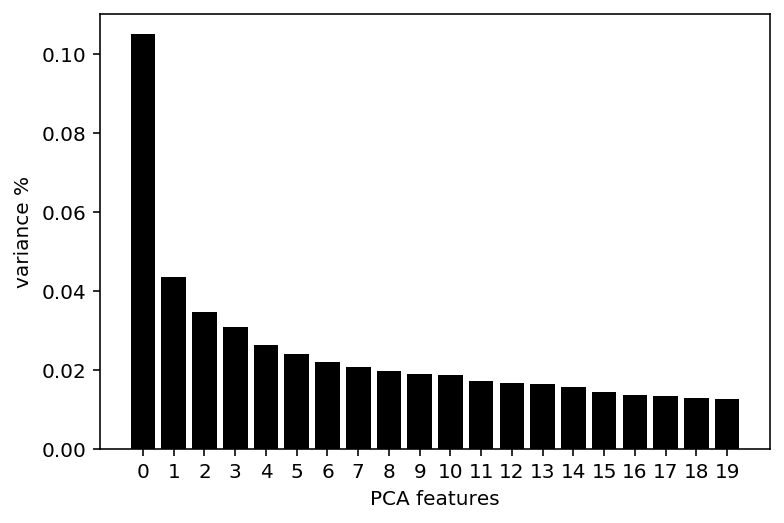

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'
from sklearn.cluster import KMeans


X = df.loc[:, df.columns != 'LOS']
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

# Create a PCA instance: pca
pca = PCA(n_components= 20)
principalComponents = pca.fit_transform(X)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

Text(0, 0.5, 'PCA 2')

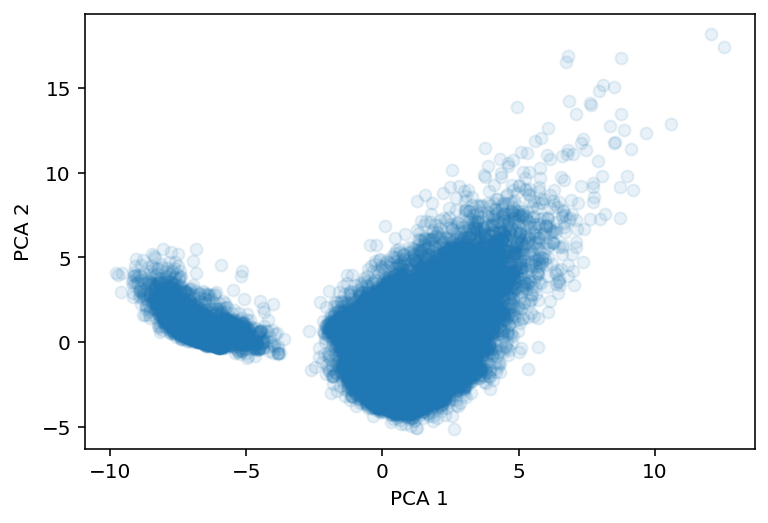

In [7]:
PCA_components = pd.DataFrame(principalComponents)
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')


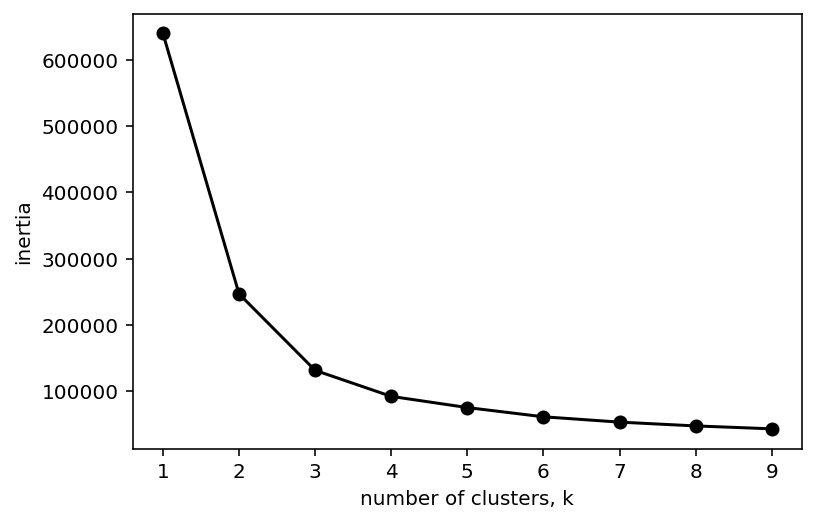

In [8]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:2])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

[0.10498496 0.04357989 0.03458645 0.03090837 0.02624986 0.02386241
 0.02201337 0.02071714 0.01955271 0.01895293 0.018776   0.01721457
 0.01664639 0.01639522 0.01551561 0.01447359 0.01361175 0.01335286
 0.01282048 0.01260219]


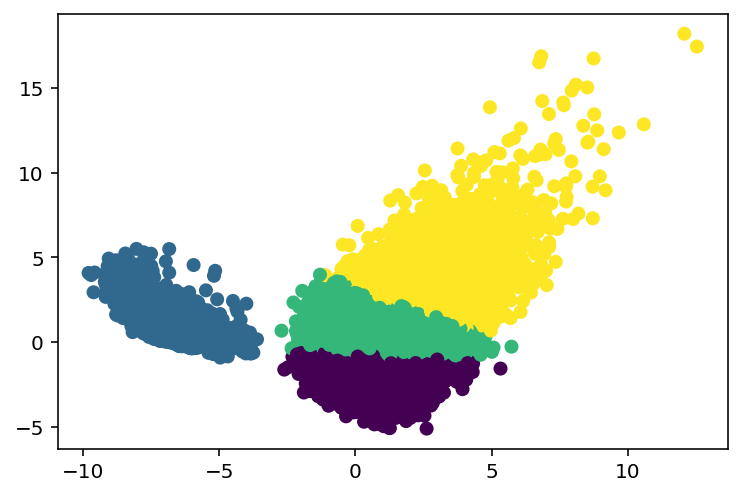

In [9]:
model = KMeans(n_clusters=4)
model.fit(PCA_components.iloc[:,:2])

labels = model.predict(PCA_components.iloc[:,:2])
plt.scatter(PCA_components[0], PCA_components[1], c=labels)
print(pca.explained_variance_ratio_)
plt.show()

In [10]:
print(pca.explained_variance_ratio_)

[0.10498496 0.04357989 0.03458645 0.03090837 0.02624986 0.02386241
 0.02201337 0.02071714 0.01955271 0.01895293 0.018776   0.01721457
 0.01664639 0.01639522 0.01551561 0.01447359 0.01361175 0.01335286
 0.01282048 0.01260219]
